In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn import datasets, linear_model
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn import preprocessing # puts the features in standard format
from sklearn import pipeline 

In [2]:
from matplotlib.axes import Subplot as splt

In [3]:
df = pd.read_csv('csv_files/final_with_dums.csv')

In [48]:
df.head()

,County,Obesity,Min Wage,Life expectancy 2010,Percent Smokers,Jan & July Public Assist. Participation,Jan & July Non-Public Assist. Participation,Jan & July TOTAL Assist. Participation,Unemployment_rate_2010,Alaska,...,Tennessee,Texas,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming,Min Wages Dummies
0,Autauga County,30.5,7.25,75.74,25.8,1706,12399,14105,8.9,0,...,0,0,0,0,0,0,0,0,0,0
1,Baldwin County,26.6,7.25,77.80,23.0,3236,34173,37409,10.0,0,...,0,0,0,0,0,0,0,0,0,0
2,Baldwin County,32.0,7.25,77.80,23.0,3236,34173,37409,10.0,0,...,0,0,0,0,0,0,0,0,0,0
3,Barbour County,37.3,7.25,75.34,26.8,2137,9847,11984,12.3,0,...,0,0,0,0,0,0,0,0,0,0
4,Barbour County,31.9,7.25,75.34,26.8,2137,9847,11984,12.3,0,...,0,0,0,0,0,0,1,0,0,0


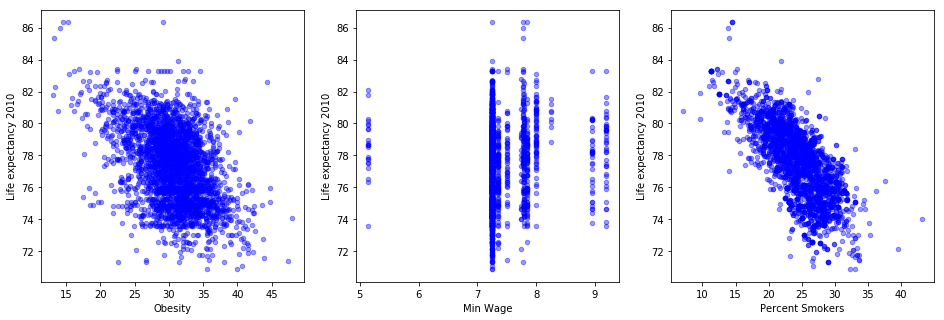

In [5]:
# Create EDA for continuous variables

# Scatter plots showing relationships between target and continuous variables
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(16,5))

# Loop through continuous variables to create scatter plots, checkin' 'em out!
for xcol, ax in zip(['Obesity', 'Min Wage', 'Percent Smokers'], axes):
    df.plot(kind='scatter', x=xcol, y='Life expectancy 2010', ax=ax, alpha=0.4, color='b')

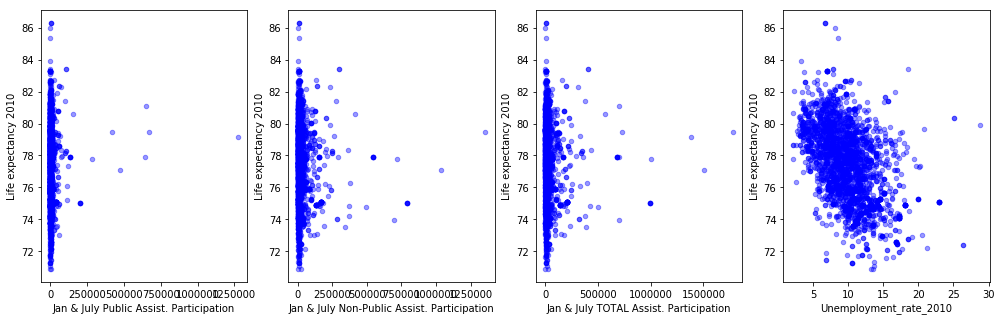

In [6]:
# Scatter plots showing relationships between target and continuous variables PART 2
fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(17,5))

for xcol, ax in zip(['Jan & July Public Assist. Participation','Jan & July Non-Public Assist. Participation', 'Jan & July TOTAL Assist. Participation',"Unemployment_rate_2010"], axes):
    df.plot(kind='scatter', x=xcol, y='Life expectancy 2010', ax=ax, alpha=0.4, color='b')

# The graphs for Public Assistance have large outliers


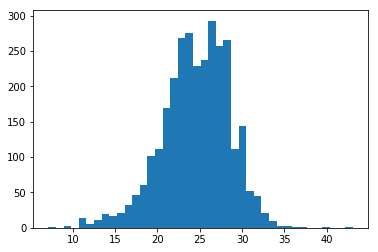

In [46]:
# Initial test of hist for one contiuous variable

plt.hist(df['Percent Smokers'], bins=40)
plt.show()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a0ee31358>,
      dtype=object)

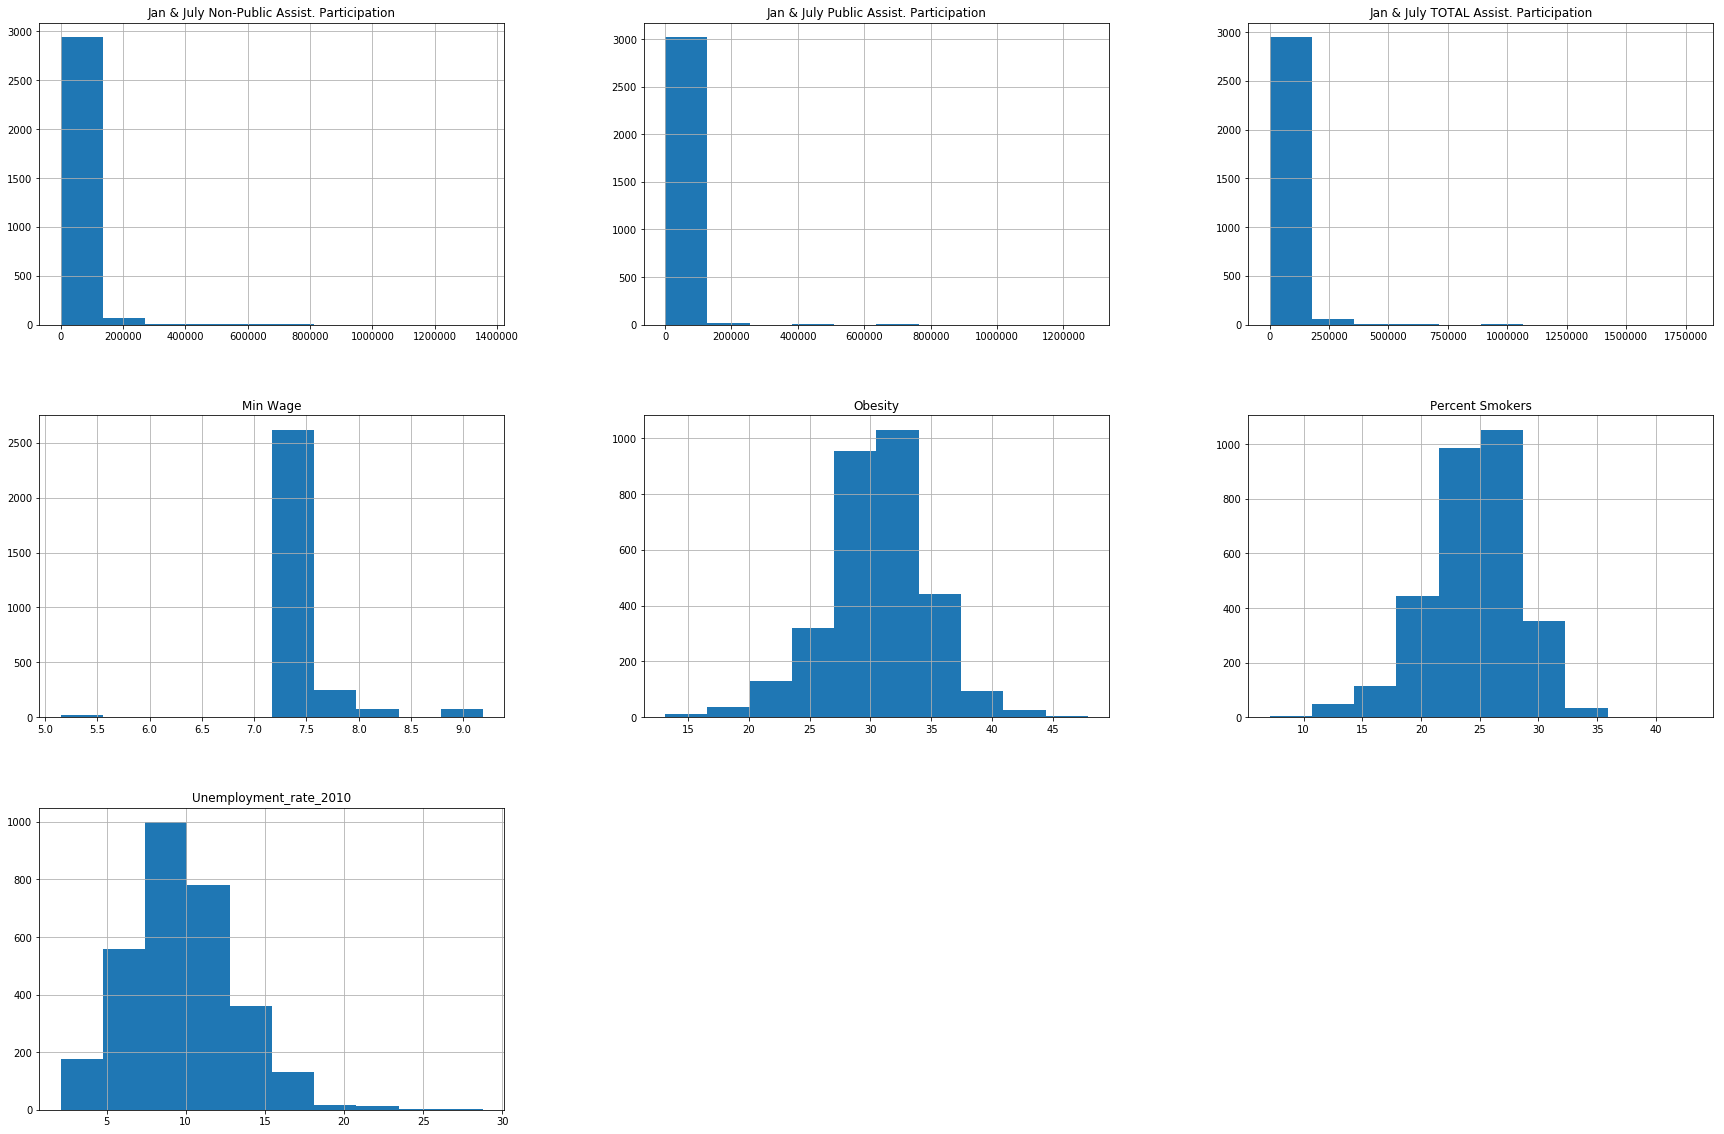

In [27]:
# Histograms of all contiuous variables

df.hist(column=['Obesity', 'Min Wage', 'Percent Smokers', 'Jan & July Public Assist. Participation','Jan & July Non-Public Assist. Participation', 'Jan & July TOTAL Assist. Participation',"Unemployment_rate_2010"], figsize=(30,20))
                
                

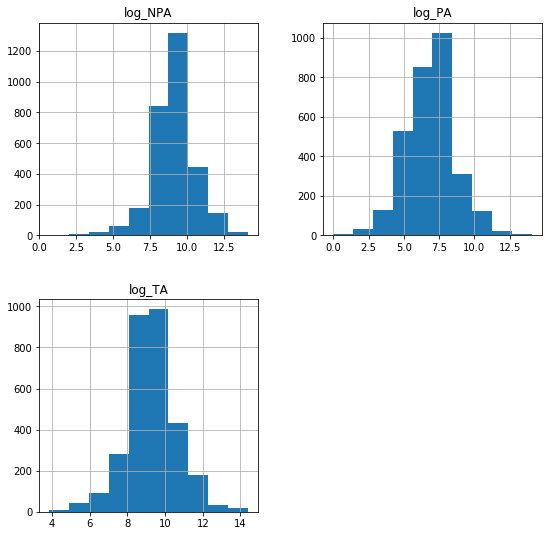

In [47]:
# Run log transform on Food Stamps vars after checking initial histogram for normality

# Create new dataframe to pass in log values of Food Stamps var
data_log = pd.DataFrame([])

# Create columns to hold log values
data_log['log_PA'] = np.log(df['Jan & July Public Assist. Participation'])
data_log['log_NPA'] = np.log(df['Jan & July Non-Public Assist. Participation'])
data_log['log_TA'] = np.log(df['Jan & July TOTAL Assist. Participation'])

# If value is zero, it will be negative inf when taking the log
data_log = data_log.replace([np.inf, -np.inf], np.nan).dropna(subset=['log_PA'], how="all")
data_log = data_log.replace([np.inf, -np.inf], np.nan).dropna(subset=['log_NPA'], how="all")
data_log = data_log.replace([np.inf, -np.inf], np.nan).dropna(subset=['log_TA'], how="all")

# Graphing the normalized histogram
data_log.hist(figsize=[9,9]);


In [52]:
data_log

,log_PA,log_NPA,log_TA
0,7.441907,9.425371,9.554285
1,8.082093,10.439191,10.529667
2,8.082093,10.439191,10.529667
3,7.667158,9.194922,9.391328
4,7.667158,9.194922,9.391328
5,7.085901,8.772300,8.942199
6,7.085901,8.772300,8.942199
7,7.623642,9.576025,9.708749
8,7.623642,9.576025,9.708749
9,7.080868,8.398410,8.635687


In [60]:
# We are joining our log-ed cat vars with our original dataframe to perform OLS analysis later

final_with_logs = df.join(data_log, how='outer').dropna()

final_with_logs.to_csv('csv_files/final_with_logs.csv', encoding='utf-8', index=False)
